In [1]:
using Distributions, CopEnt, Plots

In [2]:
mis_true, mis_knn, mis_copula = [], [], []
ρs = 0.1:0.05:0.9
for ρ in ρs
    push!(mis_true, -1 / 2 * log(1 - ρ^2))
    μ, Σ = zeros(2), [1 ρ; ρ 1]
    x = rand(MvNormal(μ, Σ), 2_000)
    push!(mis_knn, entropy_knn(x[1,:]) + entropy_knn(x[2,:]) - entropy_knn(x))
    push!(mis_copula, -copula_entropy(x))
end

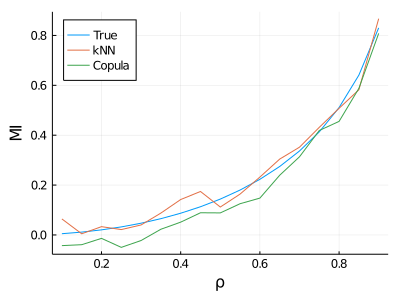

In [3]:
p = plot(size=(400, 300), legend=:topleft)
plot!(p, ρs, mis_true,   label="True")
plot!(p, ρs, mis_knn,    label="kNN")
plot!(p, ρs, mis_copula, label="Copula")
xlabel!("ρ"); ylabel!("MI")